In [2]:
import zipfile
zip_ref = zipfile.ZipFile(r'C:\Users\SNEHA GHOSH\Desktop\New folder\Yoga Pose.v1-yoga_augmented.folder.zip')
zip_ref.extractall(r'C:\Users\SNEHA GHOSH\Desktop\New folder')
zip_ref.close()

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install cvzone

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import cvzone
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [8]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    validation_split = 0.2
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\SNEHA GHOSH\Desktop\New folder\train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\SNEHA GHOSH\Desktop\New folder\valid',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(64,64))

Found 13953 files belonging to 107 classes.
Found 1165 files belonging to 107 classes.


In [10]:
vgg = VGG16(input_shape = (64,64,3),include_top = False,weights = 'imagenet')

In [11]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
yoga_model_prediction = Sequential()

In [13]:
for layer in vgg.layers[:-1]:
  yoga_model_prediction.add(layer)

In [14]:
yoga_model_prediction.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
for layer in yoga_model_prediction.layers:
  layer.trainable = False

In [16]:
yoga_model_prediction.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
yoga_model_prediction.add(Flatten())

In [18]:
yoga_model_prediction.add(Dense(107,activation = 'softmax'))

In [19]:
yoga_model_prediction.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 107)            │       876,651 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,591,339 (59.48 MB)

 Trainable params: 876,651 (3.34 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
yoga_model_prediction.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [21]:
history = yoga_model_prediction.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 115s 262ms/step - accuracy: 0.1880 - loss: 22.9335 - val_accuracy: 0.2386 - val_loss: 41.3406
Epoch 2/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 119s 273ms/step - accuracy: 0.6506 - loss: 6.4384 - val_accuracy: 0.2876 - val_loss: 44.1205
Epoch 3/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 118s 270ms/step - accuracy: 0.7835 - loss: 3.5811 - val_accuracy: 0.2687 - val_loss: 49.1528
Epoch 4/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 121s 276ms/step - accuracy: 0.8362 - loss: 2.5860 - val_accuracy: 0.2944 - val_loss: 56.8587
Epoch 5/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 121s 277ms/step - accuracy: 0.8580 - loss: 2.3153 - val_accuracy: 0.2867 - val_loss: 60.2183
Epoch 6/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 122s 280ms/step - accuracy: 0.8808 - loss: 1.8435 - val_accuracy: 0.2961 - val_loss: 63.3440
Epoch 7/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 121s 277ms/step - accuracy: 0.9111 - loss: 1.4058 - val_accuracy: 0.2961 - val_loss: 68.3318
Epoch 8/10
437/437 ━━━━━━━━━━━━━━━━━━━━ 122s 278ms/step - accuracy: 

In [22]:
yoga_model_prediction.save_weights('yoga-model.weights.h5')

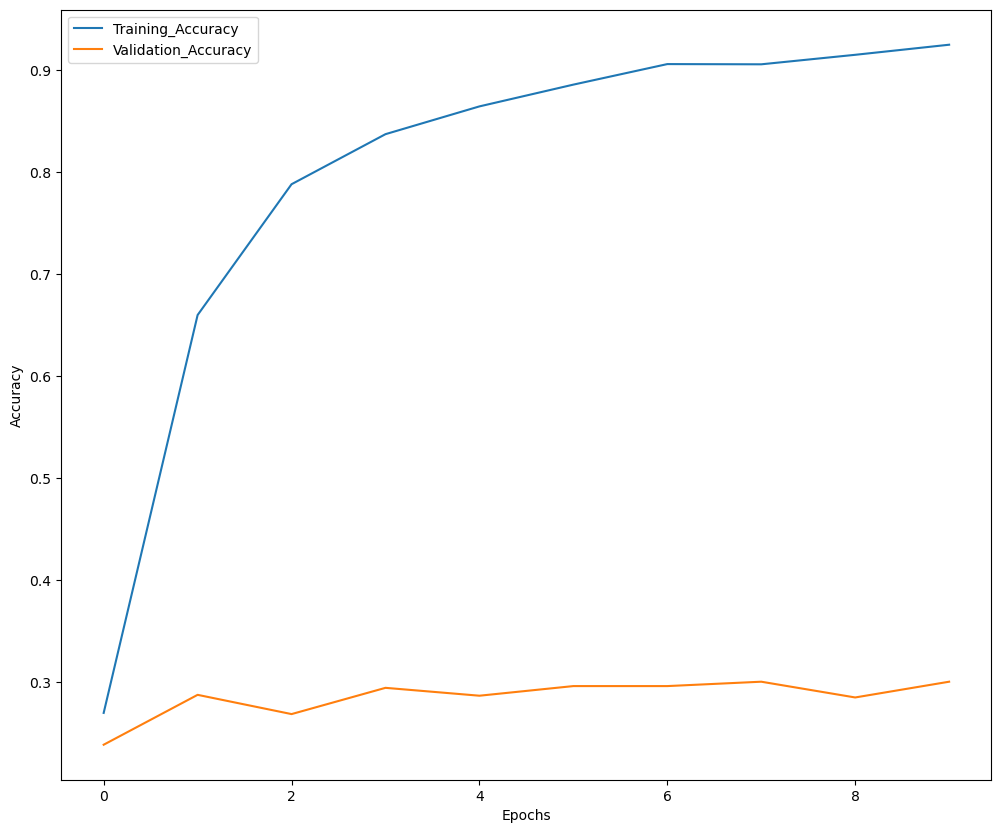

In [23]:
plt.figure(figsize = (12,10))
plt.plot(history.history['accuracy'],label = 'Training_Accuracy')
plt.plot(history.history['val_accuracy'] ,label = 'Validation_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

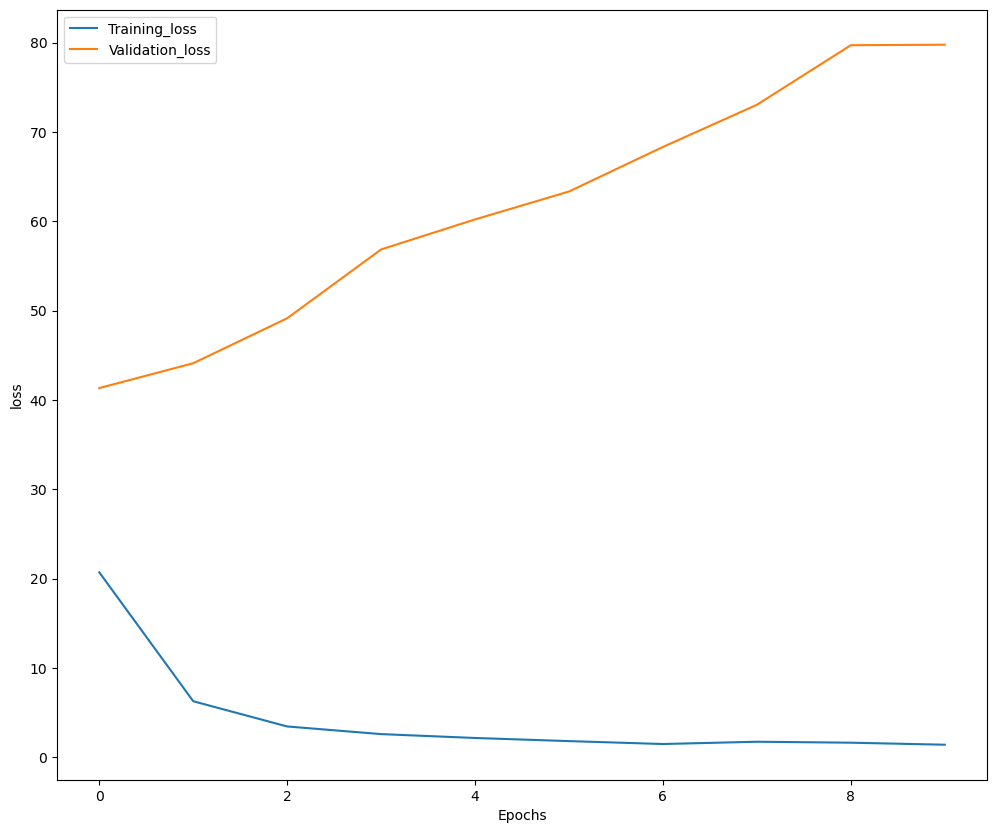

In [24]:
plt.figure(figsize = (12,10))
plt.plot(history.history['loss'],label = 'Training_loss')
plt.plot(history.history['val_loss'],label = 'Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

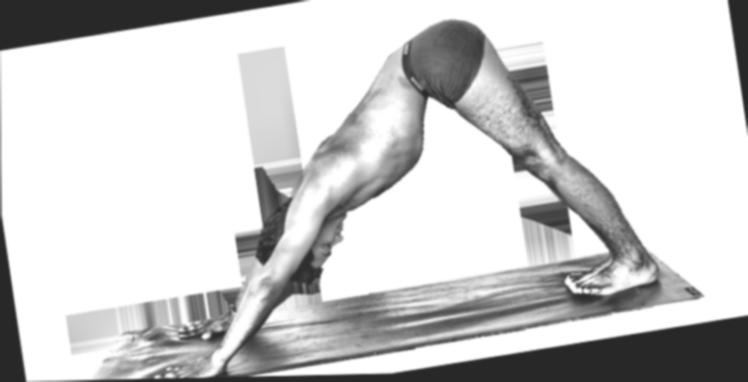

In [25]:
image = Image.open(r'C:\Users\SNEHA GHOSH\Desktop\New folder\1--1_png.rf.3a36ba5c2b2f28e446e9d183a3565e47.jpg')
display(image)

In [26]:
test_image = image.resize((64,64))
test_image_arr = np.array(test_image)
test_inp = test_image_arr.reshape(1,64,64,3)
test_inp = test_inp.astype('float32')
test_inp /= 255.0

In [27]:
prediction=yoga_model_prediction.predict(test_inp)
prediction
predicted_class_index = np.argmax(prediction)
print(predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
33


In [28]:
class_names = train_ds.class_names
print(class_names)

['adho mukha svanasana', 'adho mukha vriksasana', 'agnistambhasana', 'ananda balasana', 'anantasana', 'anjaneyasana', 'ardha bhekasana', 'ardha chandrasana', 'ardha matsyendrasana', 'ardha pincha mayurasana', 'ardha uttanasana', 'ashtanga namaskara', 'astavakrasana', 'baddha konasana', 'bakasana', 'balasana', 'bhairavasana', 'bharadvajasana i', 'bhekasana', 'bhujangasana', 'bhujapidasana', 'bitilasana', 'camatkarasana', 'chakravakasana', 'chaturanga dandasana', 'dandasana', 'dhanurasana', 'durvasasana', 'dwi pada viparita dandasana', 'eka pada koundinyanasana i', 'eka pada koundinyanasana ii', 'eka pada rajakapotasana', 'eka pada rajakapotasana ii', 'ganda bherundasana', 'garbha pindasana', 'garudasana', 'gomukhasana', 'halasana', 'hanumanasana', 'janu sirsasana', 'kapotasana', 'krounchasana', 'kurmasana', 'lolasana', 'makara adho mukha svanasana', 'makarasana', 'malasana', 'marichyasana i', 'marichyasana iii', 'marjaryasana', 'matsyasana', 'mayurasana', 'natarajasana', 'padangusthasan

In [29]:
predicted_asana = class_names[predicted_class_index]
print(predicted_asana)

ganda bherundasana


In [30]:
def predict(image):
    yoga_model_prediction.load_weights('yoga-model.h5')
    prediction = yoga_model.predict(image)
    predicted_class_index = np.argmax(prediction)
    return predicted_class_index

In [31]:
def imgProcess(predicted_asana):
    target_size=(64, 64)
    img = cv2.resize(predicted_asana, target_size)
    img = img / 255.0  
    img = np.expand_dims(img, axis=0) 
    output=yoga_model_prediction.predict(img)
    predicted_class_index = np.argmax(prediction)
    class_names = train_ds.class_names
    predicted_asana = class_names[predicted_class_index]
    return predicted_asana


In [32]:
yoga_poses = [
    "adho mukha svanasana",
    "adho mukha vriksasana",
    "agnistambhasana",
    "ananda balasana",
    "anantasana",
    "anjaneyasana",
    "ardha bhekasana",
    "ardha chandrasana",
    "ardha matsyendrasana",
    "ardha pincha mayurasana",
    "ardha uttanasana",
    "ashtanga namaskara",
    "astavakrasana",
    "baddha konasana",
    "bakasana",
    "balasana",
    "bhairavasana",
    "bharadvajasana i",
    "bhekasana",
    "bhujangasana",
    "bhujapidasana",
    "bitilasana",
    "camatkarasana",
    "chakravakasana",
    "chaturanga dandasana",
    "dandasana",
    "dhanurasana",
    "durvasasana",
    "dwi pada viparita dandasana",
    "eka pada koundinyanasana i",
    "eka pada koundinyanasana ii",
    "eka pada rajakapotasana",
    "eka pada rajakapotasana ii",
    "ganda bherundasana",
    "garbha pindasana",
    "garudasana",
    "gomukhasana",
    "halasana",
    "hanumanasana",
    "janu sirsasana",
    "kapotasana",
    "krounchasana",
    "kurmasana",
    "lolasana",
    "makara adho mukha svanasana",
    "makarasana",
    "malasana",
    "marichyasana i",
    "marichyasana iii",
    "marjaryasana",
    "matsyasana",
    "mayurasana",
    "natarajasana",
    "padangusthasana",
    "padmasana",
    "parighasana",
    "paripurna navasana",
    "parivrtta janu sirsasana",
    "parivrtta parsvakonasana",
    "parivrtta trikonasana",
    "parsva bakasana",
    "parsvottanasana",
    "pasasana",
    "paschimottanasana",
    "phalakasana",
    "pincha mayurasana",
    "prasarita padottanasana",
    "purvottanasana",
    "salabhasana",
    "salamba bhujangasana",
    "salamba sarvangasana",
    "salamba sirsasana",
    "savasana",
    "setu bandha sarvangasana",
    "simhasana",
    "sukhasana",
    "supta baddha konasana",
    "supta matsyendrasana",
    "supta padangusthasana",
    "supta virasana",
    "tadasana",
    "tittibhasana",
    "tolasana",
    "tulasana",
    "upavistha konasana",
    "urdhva dhanurasana",
    "urdhva hastasana",
    "urdhva mukha svanasana",
    "urdhva prasarita eka padasana",
    "ustrasana",
    "utkatasana",
    "uttana shishosana",
    "uttanasana",
    "utthita ashwa sanchalanasana",
    "utthita hasta padangustasana",
    "utthita parsvakonasana",
    "utthita trikonasana",
    "vajrasana",
    "vasisthasana",
    "viparita karani",
    "virabhadrasana i",
    "virabhadrasana ii",
    "virabhadrasana iii",
    "virasana",
    "vriksasana",
    "vrischikasana",
    "yoganidrasana"
]

In [33]:
className =['Person'] 

In [34]:

%pip install ultralytics 

Note: you may need to restart the kernel to use updated packages.


In [35]:
from ultralytics import YOLO
#from ultralytics.yolo.v8.detect.predict import DetectionPredictor

In [36]:
def yoga_pose_detection():
    yoga_model_detection = YOLO('yolov8n.pt')
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return
    while True:
        success, img = cap.read()
        if not success:
            print("Error: Could not read frame.")
            break
        results = yoga_model_detection(img, stream=True)
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                x1,y1,x2,y2=int(x1),int(y1),int(x2),int(y2)
                confidence = round(float(box.conf[0]), 2)
                id=int(box.cls[0])                                     
                class_name = className[id]
                cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
                if class_name == "person":
                    cropped_img = img[y1:y2, x1:x2]
                    predicted_pose = imgProcess(cropped_img)
                    #cv2.putText(img, f'{yoga_poses[predicted_pose]}', (max(0, x1), max(40, y1)),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
                    cvzone.putTextRect(img,f'{yoga_poses[predicted_pose]}',(max(0,x1),max(40,y1)))
        cv2.imshow('Yoga Pose Detection and Prediction', img)
        if cv2.waitKey(1) & 0xFF == ord('x'):
            break
    cap.release()
    cv2.destroyAllWindows()
yoga_pose_detection()


0: 480x640 1 person, 82.4ms
Speed: 2.0ms preprocess, 82.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 70.5ms
Speed: 3.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 59.2ms
Speed: 1.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 60.5ms
Speed: 1.0ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 61.5ms
Speed: 1.0ms preprocess, 61.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 65.8ms
Speed: 2.0ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 62.8ms
Speed: 1.0ms preprocess, 62.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 58.0ms
Speed: 1.0ms preprocess, 58.0ms inference, 1.0ms postprocess per image at shape (1, 3, 48

IndexError: list index out of range